### 목표
- 폐암환자의 생존을 예측하는 모델을 만들어보자!
- 신경망을 활용하여 2진분류 문데를 해결해보자!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# header : 데이터프레임에서 컬럼명을 설정해주는 함수(None : 인덱스 번호로 출력)
data = pd.read_csv("data/ThoraricSurgery.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


In [18]:
# 문제, 정답 직접 분리시켜보세요~!
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [20]:
# 학습, 평가 데이터 분리시켜보세요~!
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(352, 17)
(118, 17)
(352,)
(118,)


### keras를 활용하여 딥러닝 신경망을 구성해보자!
- 1. 신경망 구조 설계
- 2. 학습/평가방법 설정
- 3. 학습+시각화
- 4. 모델평가

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# 1. 신경망 구조 설계
model = Sequential()

# 입력층 + 하나의 중간층
# input_dim : 입력되는 데이터의 특성 개수
# activation : 활성화 함수 설정 명령(들어온 자극(데이터)에 대한 응답여부를 결정)
model.add(Dense(20, input_dim=17, activation='sigmoid'))

# 중간층(은닉층)
model.add(Dense(10, activation='sigmoid'))    # 하나의 층
model.add(Dense(5, activation='sigmoid'))     # 하나의 층

# 출력층
# 출력층 활성화 함수(회귀 : linear(디폴트 값), 2진분류 : sigmoid)
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                360       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 631
Trainable params: 631
Non-trainable params: 0
_________________________________________________________________


### activation(활성화 함수) - 자극에 대한 반응여부를 결정하는 함수
- 1. 회귀 : linear(항등함수) -> 신경망에서 도출된 수치값을 그대로 예측에 사용
- 2. 분류 : 딥러닝은 선형모델을 기반으로 하고 있기 때문에 도출되는 수치값을 분류에 그대로 사용하기는 힘듦
    -  분류 문제는 확률 정보(0~1값)를 가지고 판단하는 것이 정확
    - 이진분류 : sigmoid -> 0~1사이 값으로 0 또는 1로 분류(0.5기준)

In [29]:
# 2. 학습/평가방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수(비용함수)
#   -> 오차의 평균을 구하는 것은 mse와 동일하지만 0~1 사이 값으로
#      변환 후 평균오차를 구하는 방식
model.compile(loss='binary_crossentropy',
              optimizer='SGD',       # 최적화 함수 : 확률적 경사하강법
              metrics=['acc']         # metrics : 평가방법을 설정
              # 분류 문제이기 때문에 정확도를 평가방법에 추가해 줌
             )

In [30]:
# 3. 학습
h = model.fit(X_train, y_train,
              epochs=100        # 학습 횟수 설정
             )

Epoch 1/100
11/11 [==============================] - 0s 363us/step - loss: 0.5728 - acc: 0.8580
Epoch 2/100
11/11 [==============================] - 0s 363us/step - loss: 0.5557 - acc: 0.8580
Epoch 3/100
11/11 [==============================] - 0s 272us/step - loss: 0.5406 - acc: 0.8580
Epoch 4/100
11/11 [==============================] - 0s 363us/step - loss: 0.5271 - acc: 0.8580
Epoch 5/100
11/11 [==============================] - 0s 363us/step - loss: 0.5153 - acc: 0.8580
Epoch 6/100
11/11 [==============================] - 0s 453us/step - loss: 0.5046 - acc: 0.8580
Epoch 7/100
11/11 [==============================] - 0s 363us/step - loss: 0.4952 - acc: 0.8580
Epoch 8/100
11/11 [==============================] - 0s 272us/step - loss: 0.4867 - acc: 0.8580
Epoch 9/100
11/11 [==============================] - 0s 363us/step - loss: 0.4792 - acc: 0.8580
Epoch 10/100
11/11 [==============================] - 0s 363us/step - loss: 0.4724 - acc: 0.8580
Epoch 11/100
11/11 [===================

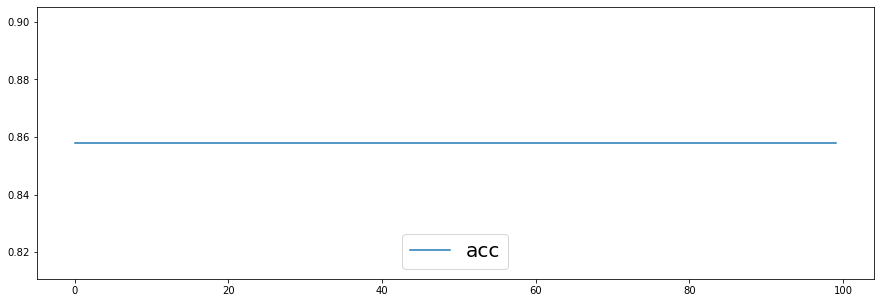

In [32]:
# 3. 시각화
plt.figure(figsize=(15,5))

# history : 학습시 출력되는 loss함수 혹은 정확도값을 가져오기 위한 명령
plt.plot(h.history['acc'], label='acc')    

plt.legend(prop={'size':20}, loc='lower center')
plt.show()

In [33]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 499us/step - loss: 0.4563 - acc: 0.8305


[0.4563225507736206, 0.8305084705352783]